# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [191]:
pd.__version__

'1.1.3'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [192]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [193]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [194]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [195]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [196]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [197]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [198]:
len(movies)

244914

### List all Batman movies ever made

In [199]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [200]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [201]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [202]:
harrypotter_df = movies[movies.title.str.contains('Harry Potter', case=False)]
harrypotter_df.sort_values(by=['year'], ascending=True)

,title,year
223087,Harry Potter and the Sorcerer's Stone,2001
82791,Harry Potter and the Chamber of Secrets,2002
61957,Harry Potter and the Prisoner of Azkaban,2004
187926,Harry Potter and the Goblet of Fire,2005
50581,Harry Potter and the Order of the Phoenix,2007
109213,Harry Potter and the Half-Blood Prince,2009
152831,Harry Potter and the Deathly Hallows: Part 1,2010
143147,Harry Potter and the Deathly Hallows: Part 2,2011


### How many movies were made in the year 2017?

In [203]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [204]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [205]:
len(movies[(movies.year >= 2000) & (movies.year <= 2018)])

114070

In [206]:
len(movies[(movies['year'] >= 2000) & (movies['year'] <= 2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [207]:
len(movies[movies.title.str.contains("Hamlet", case=False)])

57

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [208]:
movies[(movies.title.str.contains('Hamlet', 
                                  case=False)) & (movies['year'] >= 2000)].sort_values(by="year", 
                                                                                       ascending = True)

,title,year
55639,Hamlet,2000
55525,Hamlet in the Hamptons,2002
137905,Hamlet_X,2003
218468,Hamlet X,2004
40045,Hamlet (II),2005
152920,"Dogg's Hamlet, Cahoot's Macbeth",2005
200246,The Tragedy of Hamlet Prince of Denmark,2007
176528,Hamlet (II),2007
156899,Hamlet (III),2007
52408,Hamlet the Vampire Slayer,2008


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [209]:
Inception = cast['title'] == 'Inception'
Null = cast['n'].isnull()
len(cast.loc[Inception & Null,:])

27

In [210]:
import numpy as np
len(cast[(cast['title'] == 'Inception') & cast['n'].isnull() == True])

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [211]:
NotNull = cast['n'].notnull()
len(cast.loc[Inception & NotNull, :])

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [212]:
main_cast = cast[(cast['n'].notnull() == True) & (cast['title'] == 'Inception')]
main_cast.sort_values(by='n').head(10)

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [213]:
cast.columns

Index(['title', 'year', 'name', 'type', 'character', 'n'], dtype='object')

In [214]:
unique_list = cast[cast['character'] == 'Albus Dumbledore'].name.unique()
len(cast[cast['name'].isin(unique_list)])

157

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [215]:
len(cast[(cast['name'] == 'Keanu Reeves')])

62

In [216]:
len(cast[(cast['name'] == 'Keanu Reeves') & (cast['n'] == 1.0) & (cast['year'] > 1999)])

14

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [217]:
len(cast[(cast['year'] >= 1950) & (cast['year'] <= 1960)])

234635

In [218]:
len(cast[(cast['year'] >= 2007) & (cast['year'] <= 2017)])

1452413

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [219]:
len(cast[(cast['n'] == 1) & (cast['year'] > 2000)])

58535

In [220]:
len(cast[(cast['n'] != 1) & (cast['n'].isnull() == False) & (cast['year'] > 2000)])

964463

In [221]:
len(cast[(cast['n'].isnull() == True) & (cast['year'] > 2000)])

875487

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [222]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Maya                    12
Temptation              12
Othello                 11
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

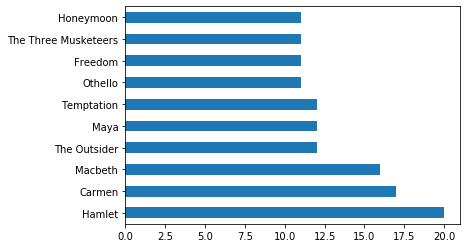

In [223]:
top_ten.plot(kind='barh')

In [224]:
movies[movies['year'] == 2115]

,title,year
78061,100 Years,2115


### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [225]:
movies[movies['year'] >= 2000].groupby('year').size().sort_values(ascending=False).head(3)

year
2017    11474
2016     9440
2015     8702
dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [226]:
import matplotlib.pyplot as plt

In [227]:
#Find decade
def find_decade(year):
    unit = year % 10
    return year - unit

movies['decade'] = movies['year'].apply(find_decade)

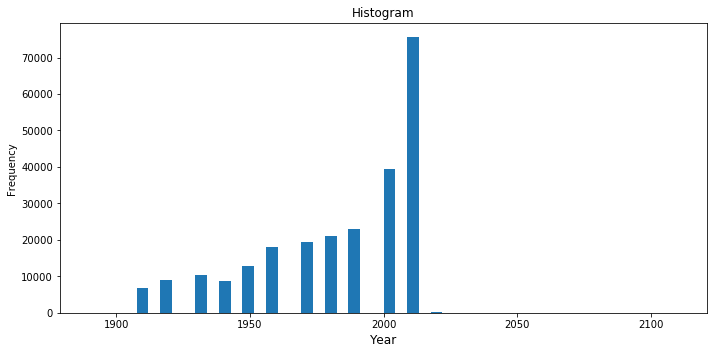

In [228]:
ax = movies['decade'].plot.hist(bins=50)
ax.set_title('Histogram', fontsize=12)
ax.set_xlabel('Year', fontsize=12)

fig = ax.figure
fig.set_size_inches(10,5)
fig.tight_layout(pad=1)

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [229]:
cast.groupby('character').size().sort_values(ascending=False).head(10)

character
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
dtype: int64

In [230]:
cast[cast['character'] == 'Herself'].groupby('name').size().sort_values(ascending=False).head(10)

name
Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marilyn Monroe                6
Rekha                         6
dtype: int64

In [231]:
cast[cast['character'] == 'Himself'].groupby('name').size().sort_values(ascending=False).head(10)

name
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [232]:
cast[cast['character'].str.startswith('Zombie')]

,title,year,name,type,character,n
223,Anthology of Horror 5,2017,Sergey A.,actor,Zombie,NaN
278,The Legion of Supervillains the Official Music...,2013,Four A.M.,actor,Zombie,NaN
380,Escaping the Dead,2017,Tobias Alring Aakast,actor,Zombie,NaN
930,Awaken the Dead,2007,Geovanny Abad,actor,Zombie,89.0
979,Zombi 3,1988,Rene Abadeza,actor,Zombie,NaN
...,...,...,...,...,...,...
3782933,When the Fever Breaks,2018,Kaight Zoia,actress,Zombie,12.0
3783044,Zombie Women of Satan 2,2016,Anna Zombie,actress,Zombie 45,78.0
3783497,Stag Night of the Dead,2010,Katalin Zsoldos,actress,Zombie,NaN
3783522,Di ingon 'nato,2011,Arman Zuasola,actress,Zombie,28.0


In [233]:
cast[cast['character'].str.startswith('Zombie')].groupby('n', dropna=False).size().sort_values(ascending=False).head(10)

n
NaN     5511
28.0      45
12.0      45
14.0      41
26.0      41
39.0      40
25.0      40
27.0      39
31.0      38
29.0      37
dtype: int64

In [234]:
cast[cast['character'].str.startswith('Police')].groupby('n', dropna=False).size().sort_values(ascending=False).head(10)

n
NaN     13576
13.0      434
10.0      422
14.0      410
15.0      409
12.0      403
11.0      402
9.0       389
18.0      369
19.0      367
dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

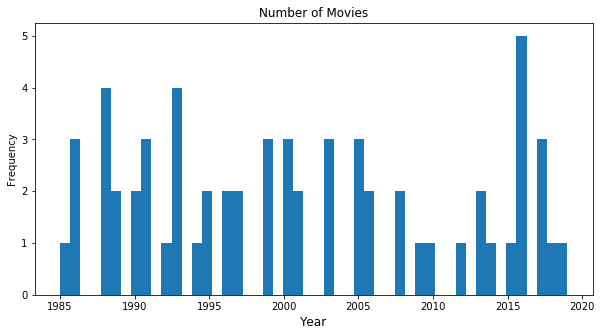

In [235]:
ax = cast[cast['name'] == 'Keanu Reeves']['year'].plot.hist(bins=50)
ax.set_title('Number of Movies', fontsize=12)
ax.set_xlabel('Year', fontsize=12)

fig = ax.figure
fig.set_size_inches(10,5)


### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


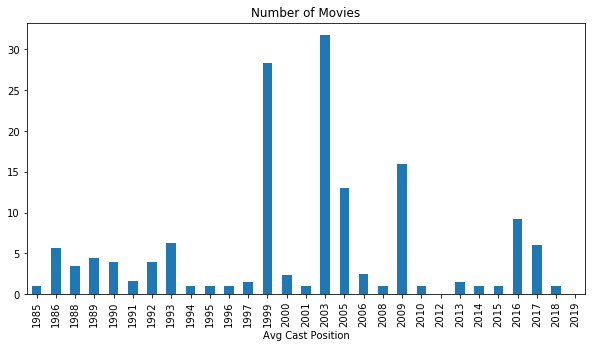

In [236]:
#To determine a metric for the cast positions, we decided to go with an average cast position over the years.

ax = cast[cast['name'] == 'Keanu Reeves'].groupby('year')['n'].agg('mean').plot.bar()
ax.set_title('Number of Movies', fontsize = 12)
ax.set_xlabel('Avg Cast Position')

fig = ax.figure
fig.set_size_inches(10,5)

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

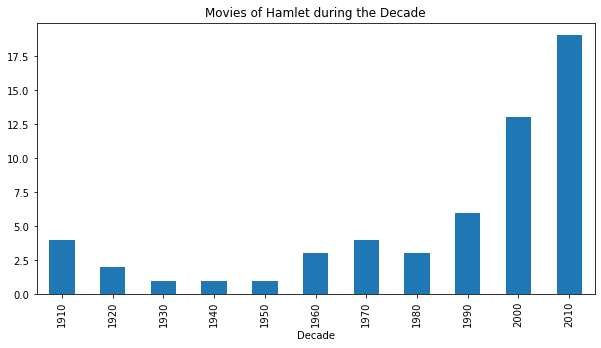

In [237]:
ax = movies[movies.title.str.contains('Hamlet')].groupby(['decade']).size().plot.bar()
ax.set_title('Movies of Hamlet during the Decade')
ax.set_xlabel('Decade')

fig = ax.figure
fig.set_size_inches(10,5)

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [238]:
#This is for the 1960s
len(cast[(cast['n'] == 1) & (cast['year'] >= 1960) & (cast['year'] <= 1969)])

11823

In [239]:
#This is for the 2000s
len(cast[(cast['n'] == 1) & (cast['year'] >= 2000) & (cast['year'] <= 2009)])

26344

In [240]:
cast[cast['name'] == 'Frank Oz']

,title,year,name,type,character,n
1723598,An American Werewolf in London,1981,Frank Oz,actor,Mr. Collins,13.0
1723599,An American Werewolf in London,1981,Frank Oz,actor,Miss Piggy,13.0
1723600,Blues Brothers 2000,1998,Frank Oz,actor,Warden,4.0
1723601,Follow That Bird,1985,Frank Oz,actor,Cookie Monster,3.0
1723602,Follow That Bird,1985,Frank Oz,actor,Bert,3.0
...,...,...,...,...,...,...
1723657,The Muppets Take Manhattan,1984,Frank Oz,actor,Cookie Monster,2.0
1723658,The Muppets Take Manhattan,1984,Frank Oz,actor,Ocean Breeze Soap Board Member,2.0
1723659,The Muppets Take Manhattan,1984,Frank Oz,actor,Sam the Eagle,2.0
1723660,Trading Places,1983,Frank Oz,actor,Corrupt Cop,46.0


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [241]:
#The values go in order by date

In [242]:
cast[cast['name'] == 'Frank Oz'].groupby('title').filter(lambda x: len(x) > 1)['title'].unique()

array(['An American Werewolf in London', 'Follow That Bird',
       'Muppet Treasure Island', 'Muppets from Space',
       'The Adventures of Elmo in Grouchland', 'The Dark Crystal',
       'The Great Muppet Caper', 'The Muppet Christmas Carol',
       'The Muppet Movie', 'The Muppets Take Manhattan'], dtype=object)

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [243]:
cast[cast['name'] == 'Frank Oz'].groupby('character').filter(lambda x: len(x) > 1)['character'].unique()

array(['Miss Piggy', 'Cookie Monster', 'Bert', 'Grover', 'Fozzie Bear',
       'Sam the Eagle', 'Animal', 'Yoda'], dtype=object)

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

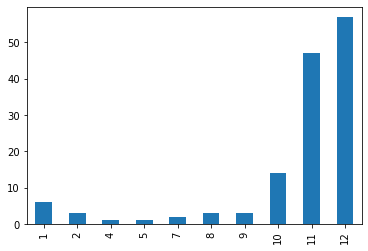

In [244]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

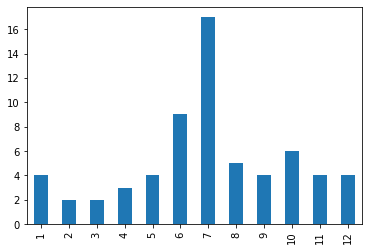

In [245]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

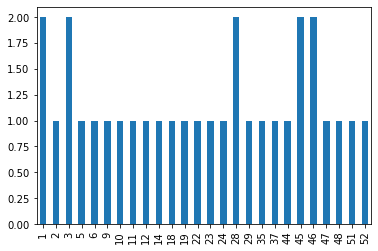

In [246]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [272]:
combined_data = pd.merge(cast, release_dates, how='inner', on=['title','year'])

In [270]:
combined_data[(combined_data['name'] == 'Keanu Reeves') & (combined_data['n'] == 1) &
              (combined_data['country'] == 'USA')].sort_values('date')

,title,year,name,type,character,n,country,date
16837127,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA,1988-04-15
8395767,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA,1989-02-17
2709676,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,USA,1991-07-19
10232894,Little Buddha,1993,Keanu Reeves,actor,Siddhartha,1.0,USA,1994-05-25
8629940,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,USA,1994-06-10
1803683,Johnny Mnemonic,1995,Keanu Reeves,actor,Johnny Mnemonic,1.0,USA,1995-05-26
10458033,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0,USA,1995-08-11
13350949,Chain Reaction,1996,Keanu Reeves,actor,Eddie Kasalivich,1.0,USA,1996-08-02
14609249,Feeling Minnesota,1996,Keanu Reeves,actor,Jjaks Clayton,1.0,USA,1996-09-13
7805546,The Devil's Advocate,1997,Keanu Reeves,actor,Kevin Lomax,1.0,USA,1997-10-17


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

In [281]:
#Add the month value
combined_data['month'] = pd.DatetimeIndex(combined_data['date']).month

In [285]:
reeves = combined_data[(combined_data['name'] == 'Keanu Reeves') &
              (combined_data['country'] == 'USA')].sort_values('date')

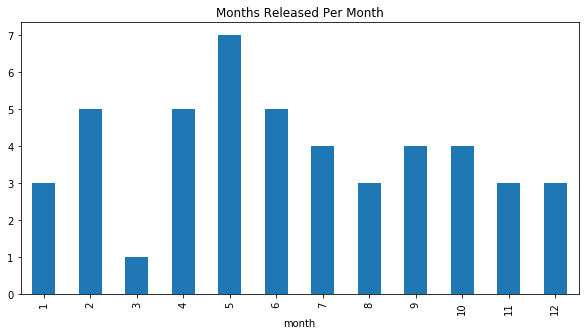

In [304]:
ax = reeves.groupby('month').size().plot.bar()
ax.set_title("Months Released Per Month")

fig = ax.figure
fig.set_size_inches(10,5)

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

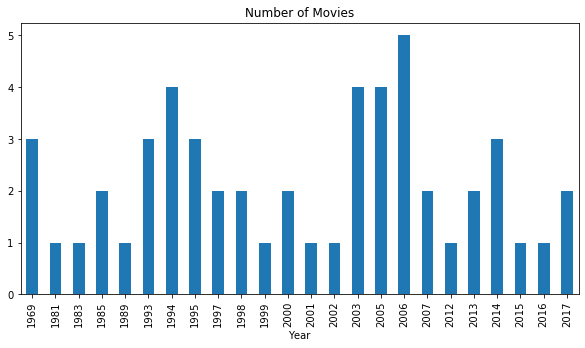

In [303]:
ax = cast[cast['name'] == 'Ian McKellen'].groupby('year').size().plot.bar()
ax.set_xlabel('Year')
ax.set_title('Number of Movies')

fig = ax.figure
fig.set_size_inches(10,5)